In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append('../scripts/')
from prepare import prepare_data
sys.path.append('../sims/')
from simfrb import SimFRB

# %matplotlib inline

In [2]:
FILE_PATH = '../Spectra_20221221230947.dat'
FILENAME = 'Spectra_20221221230947.dat'

In [3]:
data = prepare_data(FILE_PATH)
FMIN, FMAX = 1410, 1640 # [MHz]
NSPEC, NCHANS = data.shape

In [10]:
sims = SimFRB()

sim332 = sims.make_frb(2048, NCHANS, FMIN*1e6, FMAX*1e6, DM=332.72, pulse_width=0.2e-3, pulse_amp=10, t0=0)
# sim313 = sims.pts_frb(2048, NCHANS, FMIN*1e6, FMAX*1e6, DM=313, pulse_width=0.2e-3, pulse_amp=10, t0=0)

In [13]:
var = sims.dedisperse(sim332, 2048, NCHANS, FMIN*1e6, FMAX*1e6, DM=313, pulse_width=0.2e-3, pulse_amp=10, t0=0)

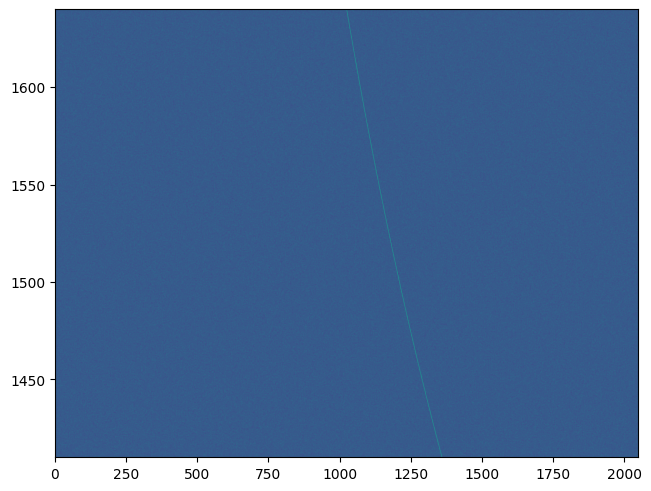

In [14]:
fig, ax = plt.subplots(constrained_layout=True)
# im = ax.imshow(sim332.T, aspect='auto', origin='lower', extent=[0, 2048, FMIN, FMAX])
im = ax.imshow(var.T, aspect='auto', origin='lower', extent=[0, 2048, FMIN, FMAX], alpha=1)
# plt.plot(var[:, 0])
# ax.imshow(sim313.T, aspect='auto', origin='lower', extent=[0, 2048, FMIN, FMAX], alpha=0.5, cmap='seismic')
# ax.imshow(sim50.T, aspect='auto', origin='lower', extent=[0, 2048, FMIN, FMAX], alpha=0.25)
# cbar = fig.colorbar(im, pad=0.01)
# cbar.set_label('Power', rotation=270, labelpad=20)
# im.set_clim(-2, 4)
# plt.xlim(2000, 2048)
# ax.set_xlabel('Time [ms]')
# ax.set_ylabel('Frequency [MHz]')
# ax.set_title('Computer simulated FRB')
plt.show()

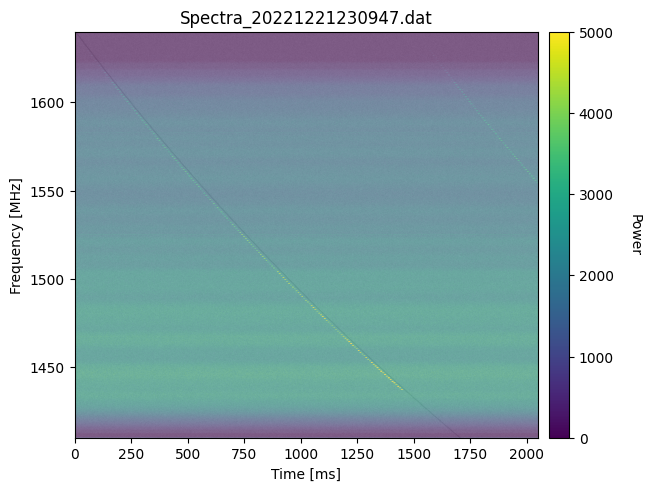

In [9]:
# [600:600+2048]

fig, ax = plt.subplots(constrained_layout=True)
im = ax.imshow(data[600:600+2048].T, aspect='auto', origin='lower', extent=[0, 2048, FMIN, FMAX])
ax.imshow(sim313.T, aspect='auto', origin='lower', extent=[0, 2048, FMIN, FMAX], alpha=0.5, cmap='gist_yarg')
cbar = fig.colorbar(im, pad=0.01)
cbar.set_label('Power', rotation=270, labelpad=20)
im.set_clim(0, 5000)
ax.set_xlabel('Time [ms]')
ax.set_ylabel('Frequency [MHz]')
ax.set_title(FILENAME)
# plt.xlim(600, 1000)
plt.show()

### FDMT

In [9]:
sys.path.append('../src/fdmt/')

from fdmt_homebrew import FDMT

In [10]:
FREQS = np.linspace(1410e6, 1640e6, NCHANS)
TIMES = np.arange(0, NSPEC)*1e-4
MAXDM = 500
fdmt = FDMT(FREQS, TIMES, MAXDM)

In [13]:
dmt = fdmt.apply(data)

nspec, nfreqs = dmt.shape
t0, dm0 = inds = np.unravel_index(np.argmax(dmt, axis=None), dmt.shape)
dm = np.linspace(0, MAXDM, dmt.shape[1])[dm0]
dm, t0, dm0

(313.1411822178798, 2097, 1282)

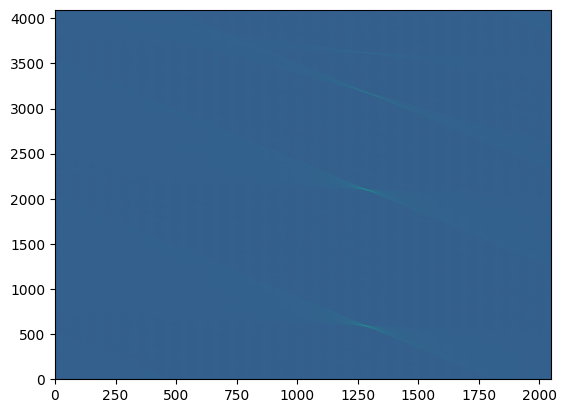

In [12]:
plt.figure()
plt.imshow(dmt, aspect='auto', origin='lower')
plt.show()